In [2]:
""" goal: analysis of kineamtics of trials.
align multiople trials of same task.
assess statistics of actions

"""

%load_ext autoreload
%autoreload 2

from tools.utils import * 
from tools.plots import *
from tools.analy import *
from tools.calc import *
from tools.analyplot import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
animal = "Pancho";
date = 200226
expt = "pilot"
session = 1
# animal = "Pancho";
# date = 200226
# expt = "pilot"
# session = 3

from tools.preprocess import *
filedata = loadSingleData(animal, date, expt, session, resave_as_dict=False, load_resaved_data=True, 
                      resave_overwrite=False)

from tools.utils import *
getMultTrialsTaskStages(filedata)

# --- save dir
SAVEDIR = plotMakeSaveDir(filedata, "analysis_twoline_planning_041020")
                          
    


found one matching filename: ['/data2/animals/Pancho/200226/200226_121930_pilot_Pancho_1.h5']
found one matching filename: ['/data2/animals/Pancho/200226/200226_121930_pilot_Pancho_1.pkl']
-- loaded presaved data: /data2/animals/Pancho/200226/200226_121930_pilot_Pancho_1.pkl
got 617 total trials


In [19]:
# -- collect d## FILTER TO FIND GOOD TRIALS, - PLOT THOSE
# --- for a given set of trials, collect trajectories for all of them

targ = {
    "task_stage":["two_lines_anywhere"],
    "behtype":["Trace (instant)"],
    "fracsuccess_min":[0.25]
}

trials_list = getIndsTrials(filedata, targ)

if True:
    trials_list = removeRedundantTrials(filedata, trials_list)

def _getStrokeDict(removeShort=True):
    # 1) load and preprocess
    stroke_dict = getMultTrialsStrokeDict(filedata, trials_list)
    if removeShort:
        # 2) remove short segments
        stroke_dict = processRemoveShortStrokes(stroke_dict)
    return stroke_dict


got 159 total trials
THIS NOT OPTIMAL - see notes. is ok if same tasks always occur in direct succession chron order.
started with 159 trials
ended with 93 trials


[getTrialsStrokes] removing stroke for calc vel since shorter than window
93
93
{'center_s0_d1': [0.4, 0.6], 'center_s1_d1': [0.5, 1], 'angletaskbin_s0': [2, 3, 6, 7]}
15
15
[getTrialsStrokes] removing stroke for calc vel since shorter than window
93
93
{'center_s0_d1': [0.4, 0.6], 'center_s1_d1': [0, 0.5], 'angletaskbin_s0': [2, 3, 6, 7]}
16
16
[getTrialsStrokes] removing stroke for calc vel since shorter than window
2
2
{'center_s0_d1': [0.4, 0.6], 'center_s1_d1': [0.5, 1], 'angletaskbin_s0': [2, 3, 6, 7]}
0
0
[getTrialsStrokes] removing stroke for calc vel since shorter than window
2
2
{'center_s0_d1': [0.4, 0.6], 'center_s1_d1': [0, 0.5], 'angletaskbin_s0': [2, 3, 6, 7]}
0
0


/home/lucast4/miniconda3/envs/drag/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/lucast4/miniconda3/envs/drag/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/data1/code/MonkeyLogic2/analysis/tools/analyplot.py:268: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  a.set_ylim([0, np.max([np.max(c) for c in counts])])


[getTrialsStrokes] removing stroke for calc vel since shorter than window
93
93
{'center_s0_d1': [0.4, 0.6], 'center_s1_d1': [0.5, 1], 'angletaskbin_s0': [2, 3, 6, 7]}
15
15
[getTrialsStrokes] removing stroke for calc vel since shorter than window
93
93
{'center_s0_d1': [0.4, 0.6], 'center_s1_d1': [0, 0.5], 'angletaskbin_s0': [2, 3, 6, 7]}
16
16


/home/lucast4/miniconda3/envs/drag/lib/python3.7/site-packages/matplotlib/projections/polar.py:55: RuntimeWarning: invalid value encountered in greater_equal
  r = np.where(r >= 0, r, np.nan)


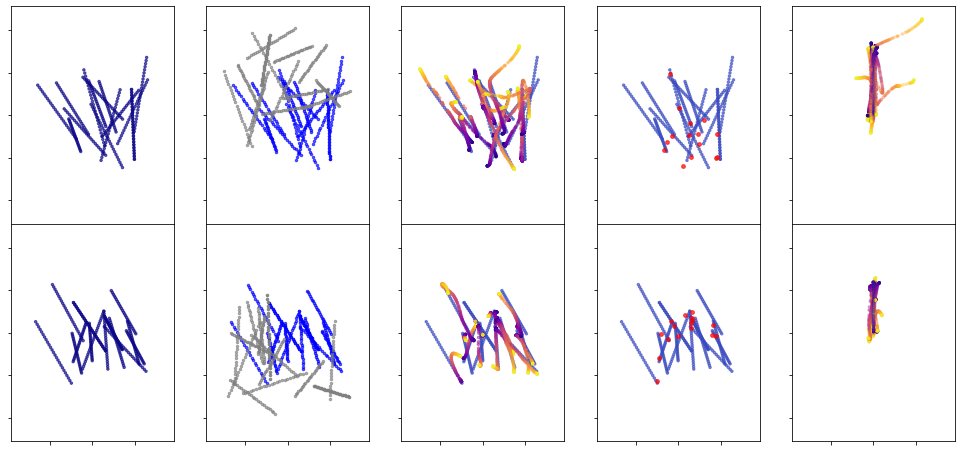

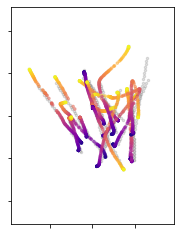

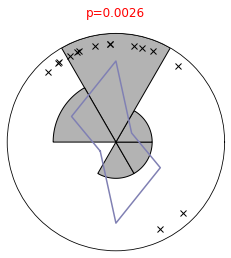

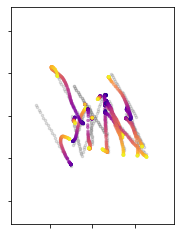

/home/lucast4/miniconda3/envs/drag/lib/python3.7/site-packages/matplotlib/projections/polar.py:55: RuntimeWarning: invalid value encountered in greater_equal
  r = np.where(r >= 0, r, np.nan)


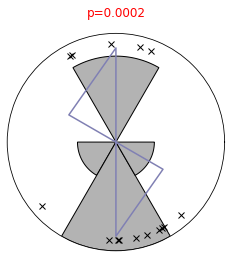

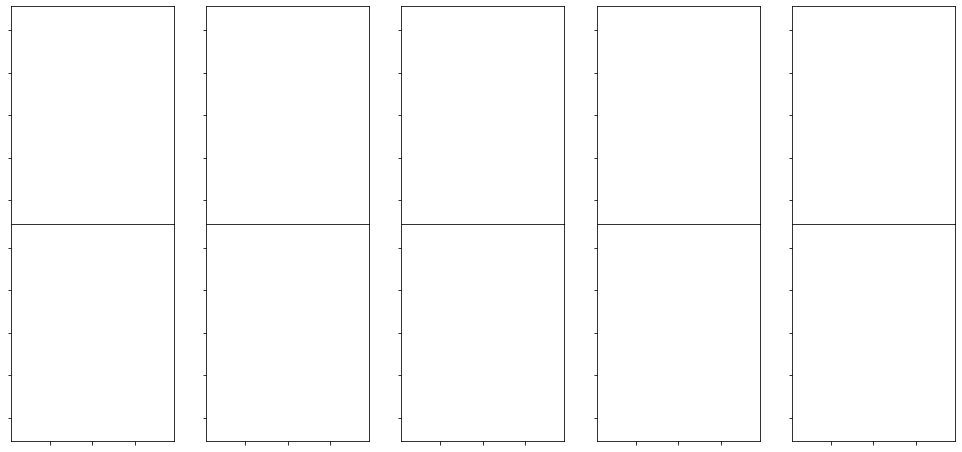

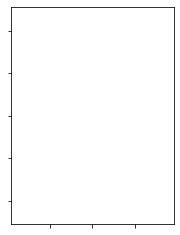

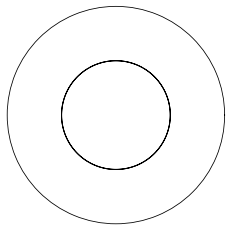

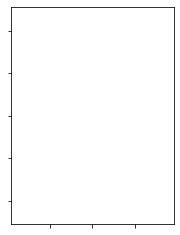

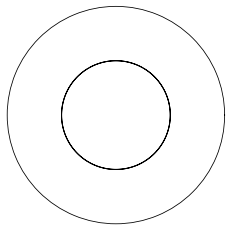

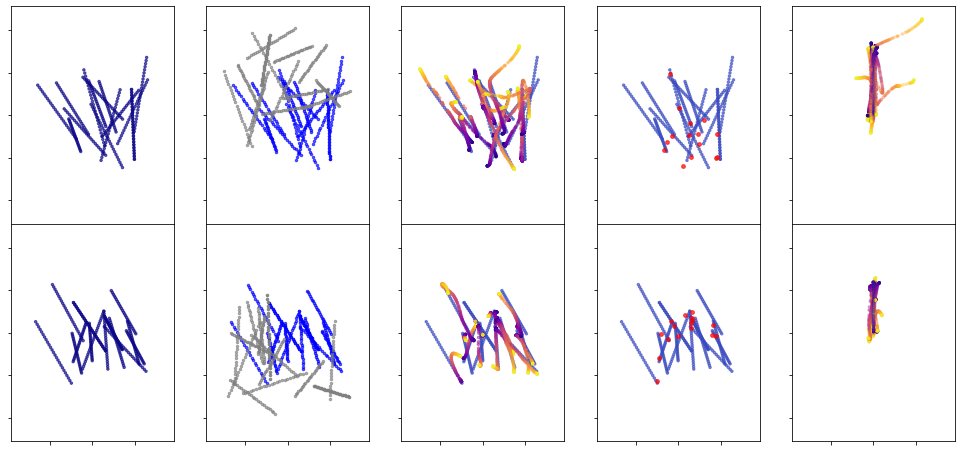

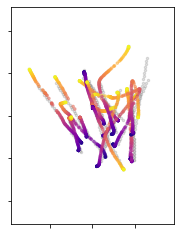

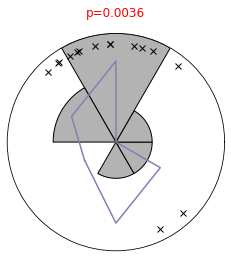

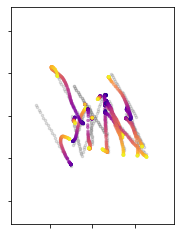

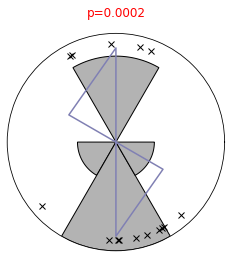

In [29]:
subsample_trials=None

FF = [{"center_s0_d1":[0.4, 0.6],  "center_s1_d1":[0.5, 1], "angletaskbin_s0":[2,3,6,7]},
      {"center_s0_d1":[0.4, 0.6],  "center_s1_d1":[0, 0.5], "angletaskbin_s0":[2,3,6,7]}]
plotDictwrapperCondOnSomething(filedata, trials_list, subsample_trials=None, 
                                       REMOVESHORT=False, try_other_dir=False, 
                                   FF = FF, faketimesteps = None , MATCH_SUBJ_TASK_FIRST_STROKE="distance",
                                  return_align_output=False)

    
subsample_trials=2
figsall = plotDictwrapperCondOnSomething(filedata, trials_list, subsample_trials=subsample_trials, 
                                       REMOVESHORT=False, try_other_dir=False, 
                                   FF = FF, faketimesteps = None , MATCH_SUBJ_TASK_FIRST_STROKE="distance",
                                  return_align_output=False)
for i, fig in enumerate(figsall):
    fig.savefig(f"{SAVEDIR}/cond_in_second_stroke_subsample{subsample_trials}_{i}.pdf")
    

subsample_trials=None
figsall = plotDictwrapperCondOnSomething(filedata, trials_list, subsample_trials=subsample_trials, 
                                       REMOVESHORT=False, try_other_dir=False, 
                                   FF = FF, faketimesteps = None , MATCH_SUBJ_TASK_FIRST_STROKE="distance",
                                  return_align_output=False)
for i, fig in enumerate(figsall):
    fig.savefig(f"{SAVEDIR}/cond_in_second_stroke_{i}.pdf")


In [113]:

stroke_dict = _getStrokeDict()
# 3) reorder task strokes
stroke_dict = processReorderStrokes(stroke_dict, filedata)
# 4) update timestamps
stroke_dict = processFakeTimesteps(stroke_dict, filedata, key_to_do="strokes_all_task", ver="from_first_touch",
                                  replace_key_to_do=True)
stroke_dict = processFakeTimesteps(stroke_dict, filedata, key_to_do="strokes_all_task", ver="from_end_of_previous_stroke",
                                  replace_key_to_do=True)
# 5) get angles of task
stroke_dict = processAngles(stroke_dict, stroke_to_use="first", force_use_two_points=True)



NOTE: need to not overwrite strokes_all_task, because then the orders saved will stop being accurate. Modify
[getTrialsStrokes] removing stroke for calc vel since shorter than window
[275, 245, 209]
[25, 25]
[206, 103]
[25, 25]
[295, 284]
[25, 25]
[295, 171]
[25, 25]
[153, 319]
[25, 25]
[187, 220, 197]
[25, 25]
[388]
[25, 25]
[322]
[25, 25]
[301]
[25, 25]
[256, 318]
[25, 25]
[295, 119]
[25, 25]
[235, 228]
[25, 25]
[236]
[25, 25]
[276, 286]
[25, 25]
[328, 163]
[25, 25]
[367]
[25, 25]
[275, 197]
[25, 25]
[230]
[25, 25]
[288, 224]
[25, 25]
[294, 172, 517]
[25, 25]
[304]
[25, 25]
[304, 120]
[25, 25]
[217, 275, 153, 171]
[25, 25]
[350]
[25, 25]
[349, 283]
[25, 25]
[321]
[25, 25]
[287, 240, 156, 180]
[25, 25]
[262, 312, 130]
[25, 25]
[431, 242]
[25, 25]
[378, 259]
[25, 25]
[246, 173, 99]
[25, 25]
[136, 312, 234, 171]
[25, 25]
[297]
[25, 25]
[]
[25, 25]


IndexError: list index out of range